In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [2]:
# Load Data
names = ["age", "sex", "chestpain", "trestbps", "chol", "fbs",
         "restecg", "thalach", "exang", "oldpeak", "slope",
        "v_colored","thal", "health", "X"]
heart_df = pd.read_csv("hypertension-dataset.csv", names = names)
heart_df.head()

,age,sex,chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,v_colored,thal,health,X
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


### Attributes Explanation
1. age: Age of Patient in years
2. sex: Male or Female field
3. chestpain: Chest Pain Type in full; values could be Typical angina (angina), atypical angina (abnang), non-anginal pain (notang) and asymptomatic (asympt)
4. trestbps: Resting Blood Pressure in mmHg
5. chol: Serun Cholestoral in mg/dl
6. fbs: Fasting Blood Sugar > 120mg/dl
7. restecg: Resting Electrocardiographic results; values could be Normal(norm),Abnormal (abn) and Hypertrophy (hyp)
8. thalach: Maximum heart rate achieved
9. exang: This is exercise induced angina; value could be True (true) or False(fal)
10. oldpeak: This is depression induced by exercise relative to rest
11. slope: The slope peak exercise ST segment; values could be upsloping (up), flat (flat) and downsloping (down).
12. v_colored: Number of vessels (0-3) colored by fluorosopy
13. thal
14. health

## Exploratory Data Analysis

In [3]:
# Get shape of Dataset

print("Shape of df", heart_df.shape)

Shape of df (303, 15)


In [4]:
heart_df = heart_df.replace("?", np.nan)

# See informations about Non-null and Data-types of heart_df
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    object 
 2   chestpain  303 non-null    object 
 3   trestbps   303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    object 
 6   restecg    303 non-null    object 
 7   thalach    303 non-null    float64
 8   exang      303 non-null    object 
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    object 
 11  v_colored  298 non-null    object 
 12  thal       301 non-null    object 
 13  health     303 non-null    object 
 14  X          303 non-null    object 
dtypes: float64(5), object(10)
memory usage: 35.6+ KB


In [5]:
## Change v_colored to a numeric field
heart_df["v_colored"] = pd.to_numeric(heart_df["v_colored"])

In [6]:
# See informations about Null values

heart_df.isnull().sum()

age          0
sex          0
chestpain    0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
v_colored    5
thal         2
health       0
X            0
dtype: int64

In [7]:
# Drop null values
heart_df.dropna(inplace = True)
print("No null values and all dtypes are in place")

No null values and all dtypes are in place


## Descriptive Analysis

In [8]:
print("Descriptive Stats")
heart_df.describe()

Descriptive Stats


,age,trestbps,chol,thalach,oldpeak,v_colored
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000


## Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health', ylabel='count'>

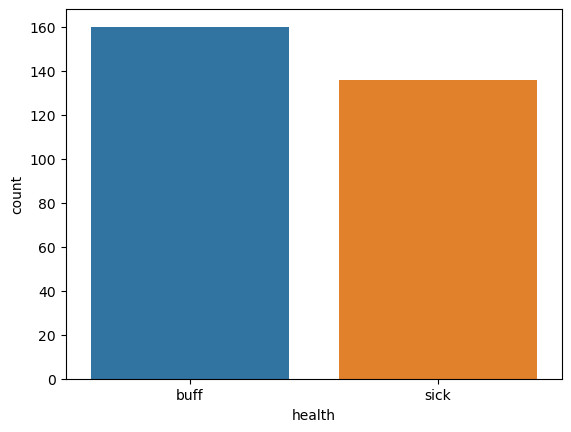

In [9]:
## See Health Distribution
sns.countplot(heart_df["health"])

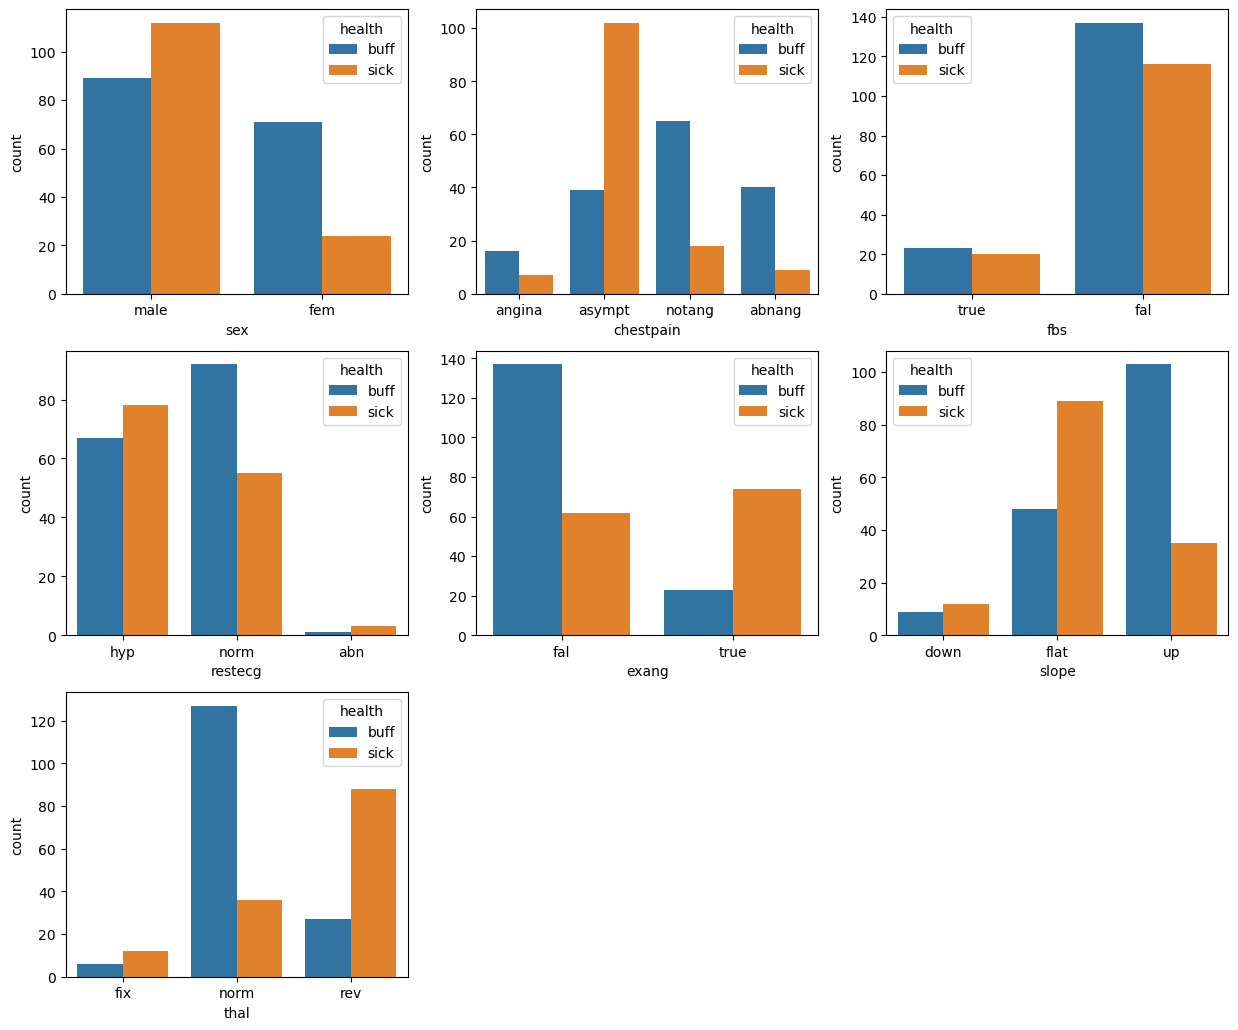

In [10]:
## See Distribution of Categorical data's with respect tp health
categories = ["sex", "chestpain", "fbs", "restecg", "exang","slope", "thal"]
pt.figure(figsize = (15,17))
for category in enumerate(categories):
    pt.subplot(4,3, category[0] + 1)
    sns.countplot(x = category[1], hue = "health", data = heart_df)
    

### Observations
1. The Males are more prone to Heart attack than the females
2. Patients with asympt (asymptomatic) chestpain are more prone to Heart attack and patients with abnang (atypical angina) are less likely to have this attack.
3. The abn (abnormal) Resting Electrocardiographic results is rare to find in Patients...
4. Patients with Normal thal are mostly safe from Heart arracks


## Age Distribution with respect to health
First, create a new column; convert the ages into ranges (0-10), (11-20), (21-30) and so on...

In [11]:
bin_ranges = [25, 30,35, 40,45, 50,55, 60,65, 70,75, 80]
heart_df["Age range"] = pd.cut(np.array(heart_df["age"]), bins = bin_ranges)

In [12]:
heart_df.dtypes

age           float64
sex            object
chestpain      object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
slope          object
v_colored     float64
thal           object
health         object
X              object
Age range    category
dtype: object

<AxesSubplot:xlabel='Age range', ylabel='count'>

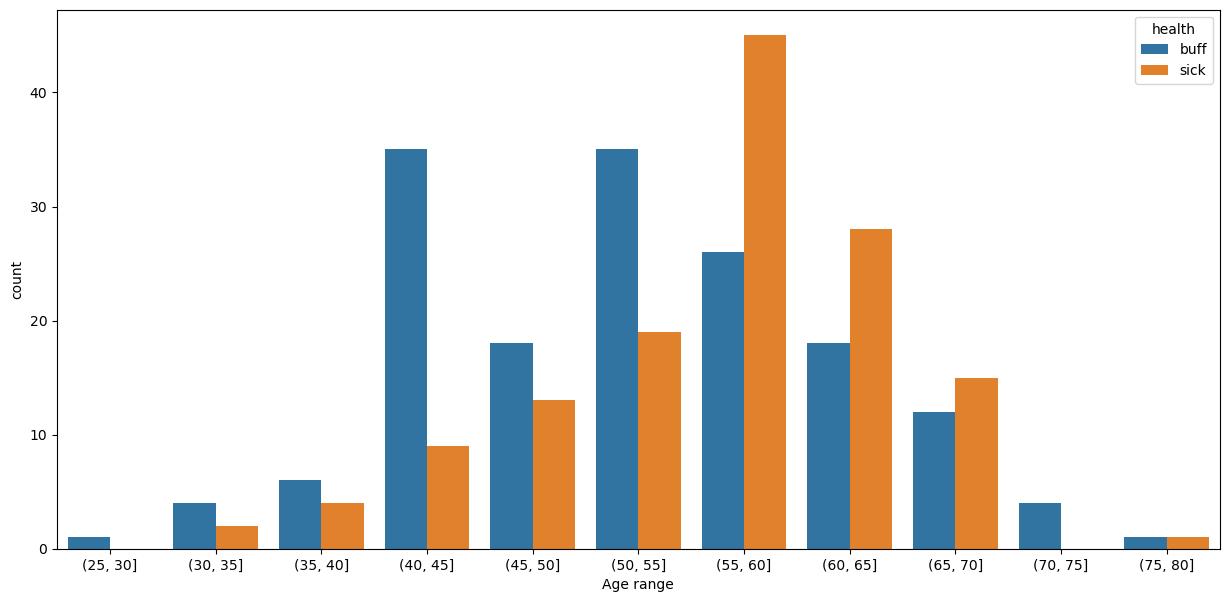

In [13]:
pt.figure(figsize=(15,7))
sns.countplot(x = "Age range", hue="health", data = heart_df)

## Observation
1. Average individuals from age 25-40 have higher chances of being affected by heart problems.
2. Old patients from 55 downwards have higher chances of getting heart attacks...

<AxesSubplot:>

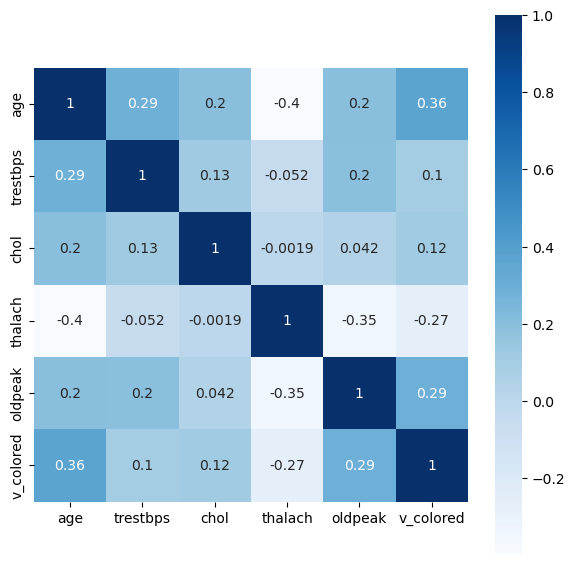

In [14]:
pt.figure(figsize = (7,7))
sns.heatmap(heart_df.corr(), annot = True, cmap="Blues", square=True)

Most attributes have weak or no correlations with each other
- v_colored and age have the highest positive correlation (.36) while thalach and v_colored have the highest negative corrlation (-.35)

In [15]:
# Categorical Data - categories
## Converting all Categorical Data to numeric using Label Encoder
categories.append("health")
save_categories_code = []
def map_category():
    for category in categories:
        encoder = LabelEncoder()
        name = encoder.fit_transform(heart_df[category])
        name_mapping ={index: label for index, label in enumerate(encoder.classes_)}
        save_categories_code.append(name_mapping)
        heart_df[category] = name
map_category()

In [16]:
heart_df.head()

,age,sex,chestpain,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,v_colored,thal,health,X,Age range
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,0,0.0,0,0,H,"(60, 65]"
1,67.0,1,2,160.0,286.0,0,1,108.0,1,1.5,1,3.0,1,1,S2,"(65, 70]"
2,67.0,1,2,120.0,229.0,0,1,129.0,1,2.6,1,2.0,2,1,S1,"(65, 70]"
3,37.0,1,3,130.0,250.0,0,2,187.0,0,3.5,0,0.0,1,0,H,"(35, 40]"
4,41.0,0,0,130.0,204.0,0,1,172.0,0,1.4,2,0.0,1,0,H,"(40, 45]"


## Modelling

### Split Dataset into Train and Test set

In [17]:
X = heart_df.drop(["health", "X", "Age range", "trestbps"], axis = 1)
y = heart_df.health

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = .3, random_state = 3)

### Decision Trees

***Model Training***

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [19]:
def show_metrics(data, predict):
    pt.figure(figsize = (3,3))
    precision_dt = precision_score(data, predict)
    recall_dt = recall_score(data, predict)
    f1_score_dt = f1_score(data, predict)
    conf_matrix_dt = confusion_matrix(data, predict)
    
    print("Accuracy Score = ", np.round(precision_dt, 2) * 100, "%")
    print("Precision Score = ",np.round(precision_dt, 2) * 100, "%")
    print("Recall Score = ",np.round(recall_dt, 2) * 100, "%")
    print("F1 Score = ",np.round(f1_score_dt, 2) * 100, "%")
    sns.heatmap(conf_matrix_dt, annot=True, square = True, cmap="Blues")

In [20]:
train_prediction_dt = dtc.predict(X_train)
test_prediction_dt = dtc.predict(X_test)

***Decision Trees***

Accuracy Score =  100.0 %
Precision Score =  100.0 %
Recall Score =  100.0 %
F1 Score =  100.0 %


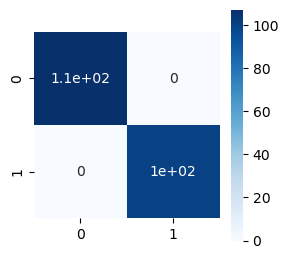

In [21]:
# Classification metrics for Training dataset - Decision Trees

show_metrics(y_train, train_prediction_dt)

Accuracy Score =  76.0 %
Precision Score =  76.0 %
Recall Score =  61.0 %
F1 Score =  68.0 %


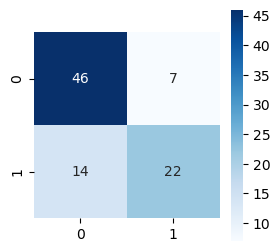

In [22]:
# Classification metrics for Test dataset - Decision Trees

show_metrics(y_test, test_prediction_dt)

**In this Task(test dataset), the critical prediction is the False Negative (15)** <br>
 **Explanation of the confusion Matrix:**<br>
1. **43 is the true positive - Patient doesn't have heart attack, and the model is predicting that they don't have.**<br>
2. **10 is the false positive - Patient doesn't have heart attack, but the model is predicting that they have; this is still better as the risk won't pose any effects to the patient...its better if we can minimize this error though**
3. **15 is the false negative - Patient has heart attack, but model says patient doesn't... this is very risky as patient may die due to lack of immediate medical attention** <br>
 Recall score is used when False Negative is critical, but our Recall score has an average score...hence, we see if there's a better model.

***Logistic Regression***

***Model Training***

In [23]:
logistic = LogisticRegression(max_iter=400)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=400)

### Model Evaluation

In [24]:
train_prediction_lr = logistic.predict(X_train)
test_prediction_lr = logistic.predict(X_test)

Accuracy Score =  86.0 %
Precision Score =  86.0 %
Recall Score =  80.0 %
F1 Score =  83.0 %


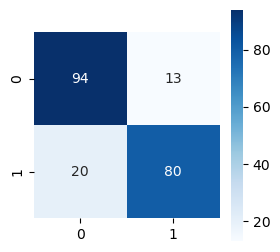

In [25]:
show_metrics(y_train, train_prediction_lr)

Accuracy Score =  82.0 %
Precision Score =  82.0 %
Recall Score =  75.0 %
F1 Score =  78.0 %


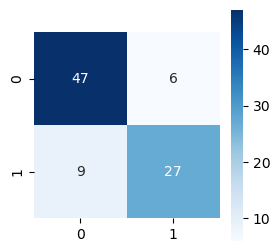

In [26]:
# Classification metrics for Train dataset

show_metrics(y_test, test_prediction_lr)

***In Logistic Regression; the Recall score is better; but can still be tuned using Hyperparameters.***